In [1]:
from pathlib import Path

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

# Load and Process Results

## Study Blockies
Load the CSV of Blocky data used in the first Blockies study

Each row corresponds to one Blocky used in the study, and contains all metadata about the blockies.  

In [2]:
samples_path = Path('/Users/djohnson/zScieboArchive/1. Research/human-ai collab/ijcai25/xai_samples')

xai_samples_csv = samples_path / 'xai_samples_df.csv'
df_xai_samples = pd.read_csv(xai_samples_csv)
df_xai_samples

,Unnamed: 0,obj_name,labeling_error,spherical,ill,ill_chars,ill_spherical,num_diff,bending,obj_rotation_roll,...,resolution,id,original_id,_attributes_status,label,__module__,__name__,filename,sphere_diff,pred
0,835,peaky,False,0.000381,0,"['mutation_color', 'med_sphere_diff', 'high_be...",0.313286,1,0.234244,-0.367960,...,"[128, 128]",0a43a265-1afa-47a5-807e-402622e5b3c8,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,0a43a265-1afa-47a5-807e-402622e5b3c8.png,0.312905,0
1,2686,peaky,False,0.213550,0,"['med_sphere_diff', 'mutation_color']",0.683102,1,0.060835,0.952238,...,"[128, 128]",a3bff5d0-4186-461e-bbaa-c5d5d089ac8f,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,a3bff5d0-4186-461e-bbaa-c5d5d089ac8f.png,0.469552,0
2,445,peaky,False,0.394242,0,['med_sphere_diff'],0.813892,2,0.056245,-0.681980,...,"[128, 128]",abc0790a-e02d-432e-9b1c-7af815cd99c0,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,abc0790a-e02d-432e-9b1c-7af815cd99c0.png,0.419649,0
3,1720,peaky,False,0.323608,0,['mutation_color'],0.232563,2,0.074188,0.415076,...,"[128, 128]",9ea15ed1-2360-4090-94c0-c2e12adce048,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,9ea15ed1-2360-4090-94c0-c2e12adce048.png,0.091044,0
4,1453,peaky,False,0.001219,0,"['med_sphere_diff', 'mutation_color', 'med_ben...",0.412923,3,0.170266,0.804310,...,"[128, 128]",0a6a8b66-04f9-443f-a92f-8da31418674a,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,0a6a8b66-04f9-443f-a92f-8da31418674a.png,0.411704,0
5,1304,peaky,False,0.730157,0,"['high_bend', 'mutation_color', 'med_sphere_di...",0.345031,3,0.292944,-0.816592,...,"[128, 128]",d9960909-f564-40da-9ee7-2c08662ebf0e,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,d9960909-f564-40da-9ee7-2c08662ebf0e.png,0.385126,0
6,2294,peaky,False,0.000377,0,[],0.060165,3,0.036525,-0.599139,...,"[128, 128]",976dae6d-b230-4907-a011-043c66af1845,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,976dae6d-b230-4907-a011-043c66af1845.png,0.059788,0
7,1213,peaky,False,1.145970,0,"['med_sphere_diff', 'mutation_mainbones', 'med...",0.693863,1,0.146608,0.460489,...,"[128, 128]",4a413017-f8a3-4186-aa45-f3ef696c275a,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,4a413017-f8a3-4186-aa45-f3ef696c275a.png,0.452107,0
8,89,peaky,False,1.131575,0,"['med_sphere_diff', 'mutation_mainbones']",0.749290,1,0.112266,-0.889479,...,"[128, 128]",27b1da38-1b35-407c-aca8-4cfcea75f896,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,27b1da38-1b35-407c-aca8-4cfcea75f896.png,0.382285,0
9,888,peaky,False,0.137552,0,"['mutation_color', 'high_sphere_diff']",0.811123,2,0.055202,-0.999076,...,"[128, 128]",54d52a66-a1e2-438e-9f42-175cc76248fc,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,54d52a66-a1e2-438e-9f42-175cc76248fc.png,0.673571,0


In [3]:
# check for main bone mutation
df_xai_samples[df_xai_samples.spherical > 1.0]

,Unnamed: 0,obj_name,labeling_error,spherical,ill,ill_chars,ill_spherical,num_diff,bending,obj_rotation_roll,...,resolution,id,original_id,_attributes_status,label,__module__,__name__,filename,sphere_diff,pred
7,1213,peaky,False,1.145970,0,"['med_sphere_diff', 'mutation_mainbones', 'med...",0.693863,1,0.146608,0.460489,...,"[128, 128]",4a413017-f8a3-4186-aa45-f3ef696c275a,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,4a413017-f8a3-4186-aa45-f3ef696c275a.png,0.452107,0
8,89,peaky,False,1.131575,0,"['med_sphere_diff', 'mutation_mainbones']",0.749290,1,0.112266,-0.889479,...,"[128, 128]",27b1da38-1b35-407c-aca8-4cfcea75f896,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,27b1da38-1b35-407c-aca8-4cfcea75f896.png,0.382285,0
18,1898,peaky,False,1.124964,1,"['mutation_mainbones', 'stretchy', 'med_sphere...",0.787262,3,0.018720,-1.009053,...,"[128, 128]",256a156e-d1f3-4f19-b12f-618a5eb85514,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,256a156e-d1f3-4f19-b12f-618a5eb85514.png,0.337702,1
27,636,peaky,False,1.118003,1,"['stretchy', 'mutation_mainbones', 'med_sphere...",0.802476,1,0.011305,0.458299,...,"[128, 128]",7fb5c524-8f47-41f3-9fe7-536515bed02b,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,7fb5c524-8f47-41f3-9fe7-536515bed02b.png,0.315527,1
35,617,peaky,False,1.145297,1,"['mutation_mainbones', 'high_bend', 'med_spher...",0.727944,1,0.326994,-0.594045,...,"[128, 128]",1fb1acfc-03c9-4a6e-b57a-e930051d04ca,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,1fb1acfc-03c9-4a6e-b57a-e930051d04ca.png,0.417353,0
38,2976,peaky,False,1.134165,1,"['mutation_mainbones', 'high_sphere_diff', 'hi...",0.598513,2,0.246746,0.778698,...,"[128, 128]",1d690c7b-c566-482d-8940-2386ee5d5364,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,1d690c7b-c566-482d-8940-2386ee5d5364.png,0.535652,0
39,2260,peaky,False,1.113149,1,"['high_bend', 'mutation_mainbones', 'med_spher...",0.649537,3,0.235082,-0.583359,...,"[128, 128]",e60423f6-8191-4cdd-84e4-cc4895cc925f,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,e60423f6-8191-4cdd-84e4-cc4895cc925f.png,0.463613,0


## Results Data
Load the per sample results of the initial study

Each Row represents the user predication for a single Blocky sample, and includes the ground truth, the AI prediction and the time taken to make the prediction.

The results are seperated by the different study phases.  `validation_nodiag` refers to the phase without an AI Diagnosis and `validation_noxai` refers to the phase with an AI diagnosis (but without XAI).


In [ ]:
results_basepath = Path('../output') / 'preprocessed_results'
stages = {'1': 'validation_nodiag', '2': 'validation_noxai'}
results_files = {v: results_basepath / f'combined_results_{v}.csv' for v in stages.values()}

dfs = {k: pd.read_csv(f) for k, f in results_files.items()}

In [22]:
dfs['validation_nodiag'].head()

,part_id,blocky_id,stakes_level,true,ai_pred,user_pred,time_taken
0,study1-17,4a413017-f8a3-4186-aa45-f3ef696c275a,high,0,0,1.0,7747.0
1,study1-17,82ba0708-3eed-4c06-9e9a-48f782b1f50e,high,1,1,1.0,43417.0
2,study1-17,9ea15ed1-2360-4090-94c0-c2e12adce048,high,0,0,0.0,4867.0
3,study1-17,eac32a1b-c04e-4628-9377-70cfed19ffdc,high,0,0,1.0,47352.0
4,study1-17,0a43a265-1afa-47a5-807e-402622e5b3c8,high,0,0,0.0,13618.0


In [5]:
df_all = pd.concat(
  (df.assign(stage=stage) for stage, df in dfs.items()),
  ignore_index=True,
)
df_nan = df_all[df_all.isna().any(axis=1)]
df_nan

,part_id,blocky_id,stakes_level,true,ai_pred,user_pred,time_taken,stage
1043,study1-27,eac32a1b-c04e-4628-9377-70cfed19ffdc,high,0,0,NaN,NaN,validation_nodiag
1424,study1-38,0a6a8b66-04f9-443f-a92f-8da31418674a,low,0,0,NaN,NaN,validation_nodiag
3282,study1-38,0a43a265-1afa-47a5-807e-402622e5b3c8,low,0,0,NaN,NaN,validation_noxai


In [6]:
for df in dfs.values():
  df.dropna(inplace=True)

In [7]:
df_noai = dfs['validation_nodiag']
df_ai = dfs['validation_noxai']

## Check Accuracies

In [8]:
df_noai_useracc = (df_noai['true'] == df_noai['user_pred']).mean()
df_noai_modelacc = (df_noai['true'] == df_noai['ai_pred']).mean()
df_ai_useracc = (df_ai['true'] == df_ai['user_pred']).mean()
df_ai_modelacc = (df_ai['true'] == df_ai['ai_pred']).mean()

print("Overall accuracy:")
print(f"Model accuracy: {df_noai_modelacc:.3f} ({df_ai_modelacc:.3f})")
print(f"User accuracy without AI: {df_noai_useracc:.3f}")
print(f"User accuracy with AI: {df_ai_useracc:.3f}")


Overall accuracy:
Model accuracy: 0.700 (0.700)
User accuracy without AI: 0.638
User accuracy with AI: 0.688


## Filter Bone Mutation

Filter out all samples with a main bone mutation


In [9]:
search_term = 'mutation_mainbones'
filter_mask = df_xai_samples['ill_chars'].map(lambda items: search_term not in items)
filtered_ids = df_xai_samples[filter_mask]['id'].tolist()

In [10]:
df_noai_filtered = df_noai[df_noai['blocky_id'].isin(filtered_ids)].copy()
df_ai_filtered = df_ai[df_ai['blocky_id'].isin(filtered_ids)].copy()
len(df_noai), len(df_noai_filtered), len(df_ai), len(df_ai_filtered)
print(f'Before (NO AI): {len(df_noai)} - After (NO AI): {len(df_noai_filtered)}')
print(f'Before (AI): {len(df_ai)} - After (AI): {len(df_ai_filtered)}')

Before (NO AI): 2078 - After (NO AI): 1714
Before (AI): 2079 - After (AI): 1715


In [11]:
df_noai_useracc = (df_noai_filtered['true'] == df_noai_filtered['user_pred']).mean()
df_noai_modelacc = (df_noai_filtered['true'] == df_noai_filtered['ai_pred']).mean()
df_ai_useracc = (df_ai_filtered['true'] == df_ai_filtered['user_pred']).mean()
df_ai_modelacc = (df_ai_filtered['true'] == df_ai_filtered['ai_pred']).mean()

print("Accuracy after filtering main bone mutations:")
print(f"Model accuracy: {df_noai_modelacc:.3f} ({df_ai_modelacc:.3f})")
print(f"User accuracy without AI: {df_noai_useracc:.3f}")
print(f"User accuracy with AI: {df_ai_useracc:.3f}")

Accuracy after filtering main bone mutations:
Model accuracy: 0.727 (0.727)
User accuracy without AI: 0.644
User accuracy with AI: 0.712


# Per Blocky Accuracies

Calcuate participant accuracy on individual Blockies

In [23]:
df_noai_filtered['user_correct'] = (df_noai_filtered['true'] == df_noai_filtered['user_pred']).astype(int)
per_blocky_accs = df_noai_filtered.groupby('blocky_id')['user_correct'].mean().sort_values(ascending=False)

df_xai_samples['accuracy'] = df_xai_samples['id'].map(per_blocky_accs)

display(per_blocky_accs.head(5)) 
display(per_blocky_accs.tail(5))

blocky_id
976dae6d-b230-4907-a011-043c66af1845    0.942308
abc0790a-e02d-432e-9b1c-7af815cd99c0    0.884615
9ea15ed1-2360-4090-94c0-c2e12adce048    0.865385
2fdd906b-a9b2-4c4b-b66b-94ab1efb1f97    0.846154
27ce8b38-01a2-4787-84e3-6119acf9d2c5    0.846154
Name: user_correct, dtype: float64

blocky_id
09a4fcaa-a63d-4a51-a177-4b22a8da18bf    0.423077
3c053c4f-9e28-406f-b9c2-924377d30ccb    0.403846
a0f7fbc0-ac09-41f1-8083-d037b4ddb194    0.346154
c766cabc-30e5-4d85-80da-2927a51cd819    0.269231
d9960909-f564-40da-9ee7-2c08662ebf0e    0.192308
Name: user_correct, dtype: float64

# Display Blockies

Display Blockies based on accuracies

In [24]:
def display_images(df, n_rows, n_cols, img_dir, title):
  """ Function to display images in a grid randomly selected from a dataframe of images.

  Args:
    df (pd.DataFrame): dataframe of images
    n_rows (int): number of rows in the grid
    n_cols (int): number of columns in the grid
    title (str): title of the plot
  """

  figsize = (n_cols * 2, n_rows*2.5)
  print(figsize)

  def get_image_path(row):
    return img_dir / f'{row["id"]}_true={row["ill"]}_pred={row["pred"]}_input.png' 
  test_images = np.array([Image.open(get_image_path(row)).convert('RGB') for _, row in df.iterrows()]) * 1. / 255
  
  # plot images in a grid
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
  axes = np.array(axes)
  for i, (ax, idx) in enumerate(zip(axes.flat, df.index)):
    ax.imshow(test_images[i])
    ax.set_title(f'True={df.loc[idx]["ill"]}\nPred={df.loc[idx]["pred"]}\nAcc={df.loc[idx]["accuracy"]:.2f}', fontsize=8)
    ax.axis('off')

  fig.suptitle(title)
  fig.tight_layout()

In [25]:
# top 5 blockies
top5_accs = per_blocky_accs.head(5)
top5_blockies = df_xai_samples[df_xai_samples['id'].isin(top5_accs.index)]
top5_blockies

,Unnamed: 0,obj_name,labeling_error,spherical,ill,ill_chars,ill_spherical,num_diff,bending,obj_rotation_roll,...,id,original_id,_attributes_status,label,__module__,__name__,filename,sphere_diff,pred,accuracy
2,445,peaky,False,0.394242,0,['med_sphere_diff'],0.813892,2,0.056245,-0.681980,...,abc0790a-e02d-432e-9b1c-7af815cd99c0,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,abc0790a-e02d-432e-9b1c-7af815cd99c0.png,0.419649,0,0.884615
3,1720,peaky,False,0.323608,0,['mutation_color'],0.232563,2,0.074188,0.415076,...,9ea15ed1-2360-4090-94c0-c2e12adce048,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,9ea15ed1-2360-4090-94c0-c2e12adce048.png,0.091044,0,0.865385
6,2294,peaky,False,0.000377,0,[],0.060165,3,0.036525,-0.599139,...,976dae6d-b230-4907-a011-043c66af1845,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,976dae6d-b230-4907-a011-043c66af1845.png,0.059788,0,0.942308
15,2160,peaky,False,0.994350,1,"['stretchy', 'high_bend', 'med_sphere_diff']",0.521501,3,0.316719,-0.420047,...,2fdd906b-a9b2-4c4b-b66b-94ab1efb1f97,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,2fdd906b-a9b2-4c4b-b66b-94ab1efb1f97.png,0.472849,1,0.846154
36,1548,peaky,False,0.207823,1,"['high_bend', 'stretchy', 'mutation_color']",0.021687,3,0.354080,-0.799805,...,27ce8b38-01a2-4787-84e3-6119acf9d2c5,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,27ce8b38-01a2-4787-84e3-6119acf9d2c5.png,0.186136,0,0.846154


(10, 2.5)


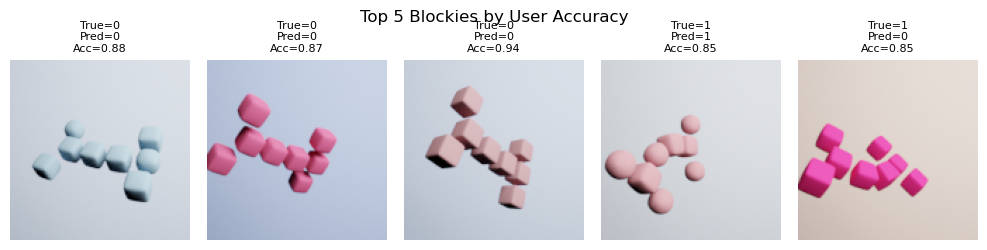

In [26]:
display_images(top5_blockies, 1, 5, samples_path, 'Top 5 Blockies by User Accuracy')

In [27]:
bottom5_accs = per_blocky_accs.tail(5)[::-1]
bottom5_blockies = df_xai_samples[df_xai_samples['id'].isin(bottom5_accs.index)]
bottom5_blockies

,Unnamed: 0,obj_name,labeling_error,spherical,ill,ill_chars,ill_spherical,num_diff,bending,obj_rotation_roll,...,id,original_id,_attributes_status,label,__module__,__name__,filename,sphere_diff,pred,accuracy
5,1304,peaky,False,0.730157,0,"['high_bend', 'mutation_color', 'med_sphere_di...",0.345031,3,0.292944,-0.816592,...,d9960909-f564-40da-9ee7-2c08662ebf0e,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,d9960909-f564-40da-9ee7-2c08662ebf0e.png,0.385126,0,0.192308
13,2833,peaky,False,0.795564,0,"['med_sphere_diff', 'high_bend']",0.440527,1,0.286360,0.651172,...,a0f7fbc0-ac09-41f1-8083-d037b4ddb194,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,a0f7fbc0-ac09-41f1-8083-d037b4ddb194.png,0.355036,0,0.346154
17,1579,peaky,False,0.000580,1,"['high_bend', 'high_sphere_diff', 'mutation_co...",0.591377,2,0.261735,0.631277,...,09a4fcaa-a63d-4a51-a177-4b22a8da18bf,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,09a4fcaa-a63d-4a51-a177-4b22a8da18bf.png,0.590797,1,0.423077
28,2003,peaky,False,0.358864,0,"['med_sphere_diff', 'mutation_color', 'high_be...",0.799503,3,0.298729,-0.658360,...,c766cabc-30e5-4d85-80da-2927a51cd819,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,c766cabc-30e5-4d85-80da-2927a51cd819.png,0.440639,1,0.269231
31,341,peaky,False,0.702236,0,"['med_bend', 'med_sphere_diff']",1.123864,2,0.137570,0.739886,...,3c053c4f-9e28-406f-b9c2-924377d30ccb,NaN,"{'obj_name': 'sampled', 'labeling_error': 'sam...",peaky,two4two.scene_parameters,SceneParameters,3c053c4f-9e28-406f-b9c2-924377d30ccb.png,0.421628,1,0.403846


(10, 2.5)


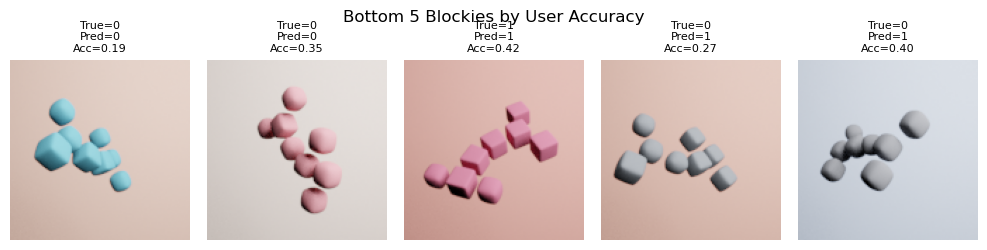

In [28]:
display_images(bottom5_blockies, 1, 5, samples_path, 'Bottom 5 Blockies by User Accuracy')